### import

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
%matplotlib inline

### multiplication to addition

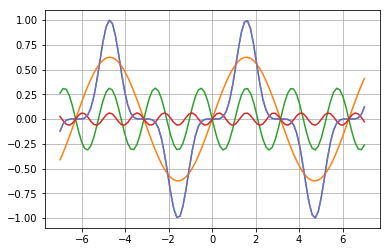

In [2]:
x = np.linspace(-7, 7, 100)
original = np.sin(x)**5
f1 = np.sin(x)*5/8
f2 = -np.sin(3*x)*5/16
f3 = np.sin(5*x)/16
mix = f1 + f2 + f3
plt.plot(x, original)
plt.plot(x, f1)
plt.plot(x, f2)
plt.plot(x, f3)
plt.plot(x, mix, linestyle="--")
plt.grid(True)
plt.show()

## descrete Fourier

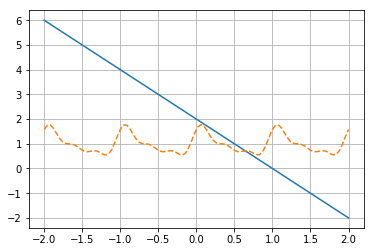

In [50]:
x = np.linspace(-2, 2, 100)
original = -2*x+2
mix = 5 + 1.6 * (np.exp(2*np.pi*1j*x).real + np.exp(2*np.pi*1j*x).imag) + 0.8 * (np.exp(4*np.pi*1j*x).real + np.exp(4*np.pi*1j*x).imag) + 0.5 * (np.exp(6*np.pi*1j*x).real + np.exp(6*np.pi*1j*x).imag)
mix /= 5
plt.plot(x, original)
plt.plot(x, mix, linestyle="--")
plt.grid(True)
plt.show()

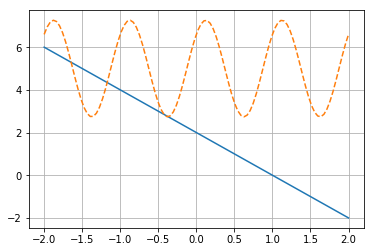

In [51]:
x = np.linspace(-2, 2, 100)
original = -2*x+2
mix = 5 + 1.6 * (np.exp(2*np.pi*1j*x).real + np.exp(2*np.pi*1j*x).imag)
plt.plot(x, original)
plt.plot(x, mix, linestyle="--")
plt.grid(True)
plt.show()

[[1.125+0.00000000e+00j]
 [0.125-3.01776695e-01j]
 [0.125-1.25000000e-01j]
 [0.125-5.17766953e-02j]
 [0.125-1.53080850e-17j]
 [0.125+5.17766953e-02j]
 [0.125+1.25000000e-01j]
 [0.125+3.01776695e-01j]]


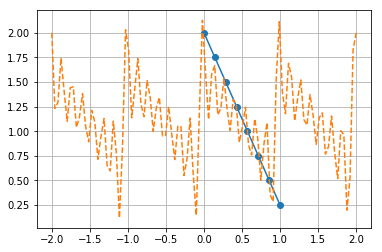

In [13]:
n = 8
x = np.zeros((n, n), dtype=complex)
f = np.array([[2, 1.75, 1.5, 1.25, 1, 0.75, 0.5, 0.25]])
for a in range(n):
    for b in range(n):
        x[a,b] = np.exp(-1j*a*b*2*np.pi/n)
ro = np.dot(x, f.T)
a = ro/n
print(a)
x = np.linspace(-2, 2, 100)
ix = np.linspace(0, 1, 8)
original = -2*x+2
mix = 0 + 0j
for i in range(n):
    mix += a[i] * np.exp(i*2*np.pi*1j*x)
plt.plot(ix, f.T, marker="o")
plt.plot(x, mix.real, linestyle="--")
plt.grid(True)
plt.show()

## Discrete Cosine Transform

In [26]:

data = np.loadtxt("import.txt")
n = data.size
ix = np.zeros(n)
f = np.zeros((n,1))
filterArray = np.zeros((n, n))
debugArray = np.zeros((n, n))
for y in range(n):
    for x in range(n):
        if y == 0:
            filterArray[y, x] = 1/n;
        else:
            debugArray[y, x] = (2*x+1)*y;
            filterArray[y, x] = 1/n*2*np.cos((2*x+1)*y*np.pi/n/2)
        
for i in range(n):
    ix[i] = (i*2 + 1) / n / 2;
    #examplePointData
    #f[i] = np.cos(ix[i]*np.pi*2)
#calculateFromData
f = data
    
c = np.dot(filterArray, f)

x = np.linspace(-2, 2, 100)
restoreF = np.zeros(100)
for i in range(n):
        restoreF += c[i]*np.cos(2*i*np.pi*x/2)
    
        
np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)
#print(c.T)
np.savetxt('export.txt', c)
plt.plot(ix, f, marker="o")
plt.plot(x, restoreF)
plt.grid(True)
plt.show()

## DCT-Ⅱ Provisional

In [ ]:
compressionRate=1
data = np.loadtxt("import.txt")
n = data.size
ix = np.zeros(n)
f = np.zeros((n,1))
c = np.zeros(n)

#createData--------------
for i in range(n):
    ix[i] = (i*2 + 1) / n / 2;
    #examplePointData
    #f[i] = np.cos(ix[i]*np.pi*2)
#calculateFromData
f = data

#DCT----------------------
for k in range(int(n*compressionRate)):
    for i in range(n):
            c[k] += f[i]*np.cos(np.pi/n*(i+1/2)*k)/n
    if k != 0:
        c[k] *= 2

    
#restore---------------------
x = np.linspace(-2, 2, 100)
restoreF = np.zeros(100)
for i in range(n):
        restoreF += c[i]*np.cos(2*i*np.pi*x/2)
    
        
np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)
#print(c.T)
np.savetxt('export.txt', c)
plt.plot(ix, f, marker="o")
plt.plot(x, restoreF)
plt.grid(True)
plt.show()

In [7]:
compressionRate=1
img = Image.open('8X8.png')
width, height = img.size
img_pixels = np.zeros((width, height));
f = np.zeros((width, height))
F = np.zeros((width, height))
for y in range(height):
  for x in range(width):
    # getpixel((x,y))で左からx番目,上からy番目のピクセルの色を取得し、img_pixelsに追加する
    img_pixels[x, y] = img.getpixel((x,y))[0]
plt.ﬁgure(1, ﬁgsize=(12, 4))
plt.gray()
plt.subplot(1, 3, 1)
plt.pcolor(img_pixels);
#DCT-------------------------------
def c(x):
    if x == 0:
        return 1/np.sqrt(2)
    else:
        return 1

def cosFunc(x, y, u, v):
    return (np.cos((2*x+1)*u/(2*width)*np.pi)) * (np.cos((2*y+1)*v/(2*width)*np.pi))

def tCosArray(u, v):
    result = 0
    for y in range(height):
        for x in range(width):
            result += img_pixels[x, y] * cosFunc(x, y, u, v)
    return result

def iCosArray(x, y):
    result = 0
    for v in range(height):
        for u in range(width):
            result += c(u)*c(v)*F[u, v] * cosFunc(x, y, u, v)
    return result

for y in range(int(height*compressionRate)):
    for x in range(int(width*compressionRate)):
        F[x, y] = (2*c(x)*c(y))/width*tCosArray(x, y)

for y in range(height):
    for x in range(width):
        f[x, y] = 2/width*iCosArray(x, y)
        
plt.subplot(1, 3, 2)
plt.pcolor(f)
plt.subplot(1, 3, 3)
plt.pcolor((img_pixels-f).astype(np.int))
plt.show()
